# **Task 2: Customer Segmentation Using Unsupervised Learning**

***Objective:***

Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

● ***Conduct Exploratory Data Analysis (EDA)***

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()   # data is already clean

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


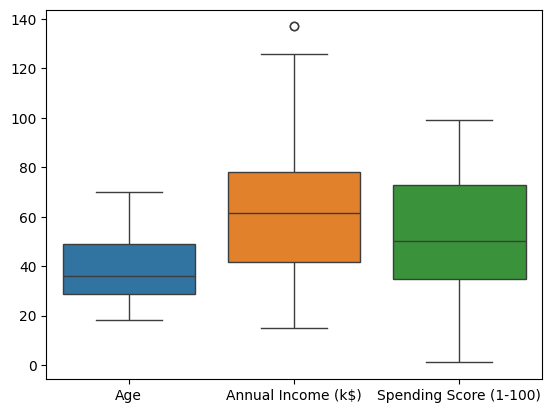

In [ ]:
# outlier detection
df_new = df.drop(['CustomerID'], axis=1)
boxplot = sns.boxplot(df_new)

In [ ]:
# outlier removal
Q1 = df_new['Annual Income (k$)'].quantile(0.25)
Q3 = df_new['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

data = df_new[~((df_new['Annual Income (k$)'] < (Q1 - 1.5 * IQR)) | (df_new['Annual Income (k$)'] > (Q3 + 1.5 * IQR)))]

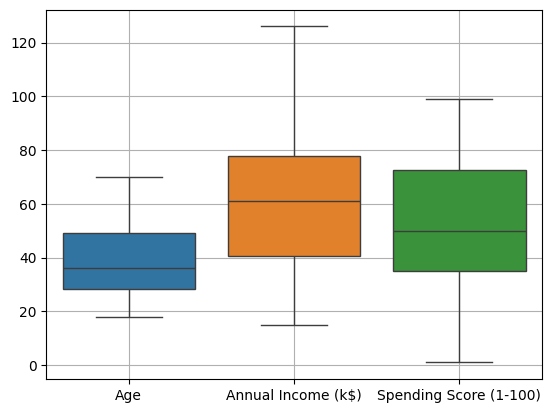

In [ ]:
sns.boxplot(data)
plt.grid(True)

● ***Apply K-Means Clustering to segment customers***  

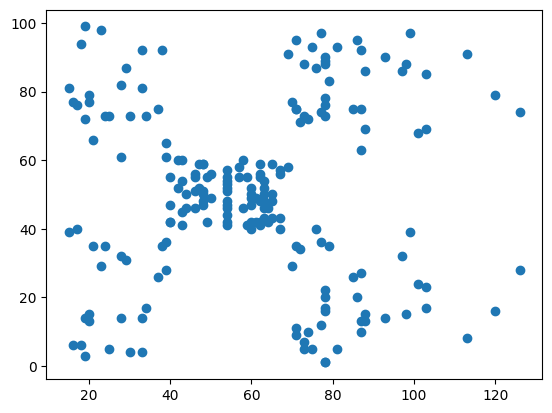

In [ ]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [ ]:
km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [ ]:
y_predicted = km.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3],
      dtype=int32)

In [ ]:
data['cluster'] = y_predicted
data.head()

/tmp/ipython-input-3558340120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y_predicted


,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,4
2,Female,20,16,6,1
3,Female,23,16,77,4
4,Female,31,17,40,1


Text(0, 0.5, 'Spending Score (1-100)')

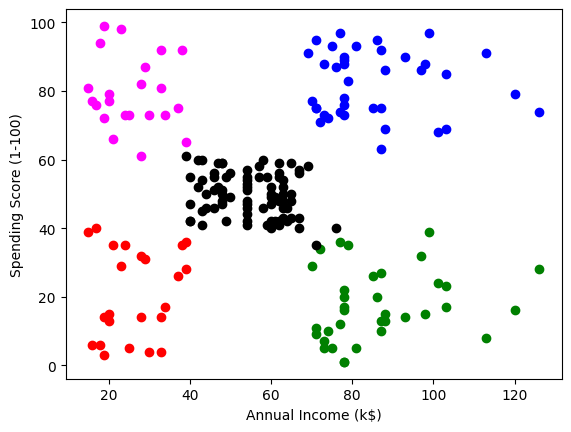

In [ ]:
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]
data4 = data[data.cluster==3]
data5 = data[data.cluster==4]

plt.scatter(data1['Annual Income (k$)'],data1['Spending Score (1-100)'],color='green')
plt.scatter(data2['Annual Income (k$)'],data2['Spending Score (1-100)'],color='red')
plt.scatter(data3['Annual Income (k$)'],data3['Spending Score (1-100)'],color='black')
plt.scatter(data4['Annual Income (k$)'],data4['Spending Score (1-100)'],color='blue')
plt.scatter(data5['Annual Income (k$)'],data5['Spending Score (1-100)'],color='magenta')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [ ]:
# if the clusters are unusual then use MinMax Scalar
# but here the clusters are fine.

In [ ]:
km.cluster_centers_

array([[86.34285714, 17.57142857],
       [26.30434783, 20.91304348],
       [55.0875    , 49.7125    ],
       [85.21052632, 82.10526316],
       [25.72727273, 79.36363636]])

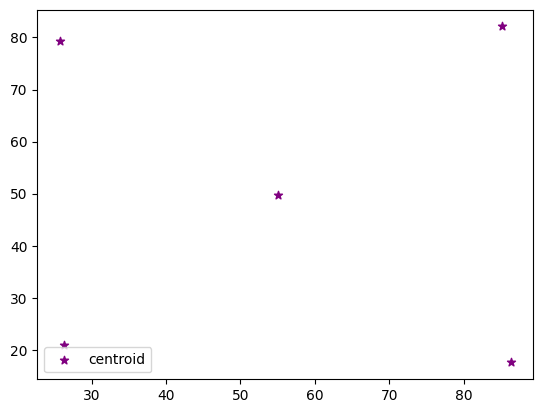

In [ ]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

these are the centers of each clusters

Text(0, 0.5, 'Spending Score (1-100)')

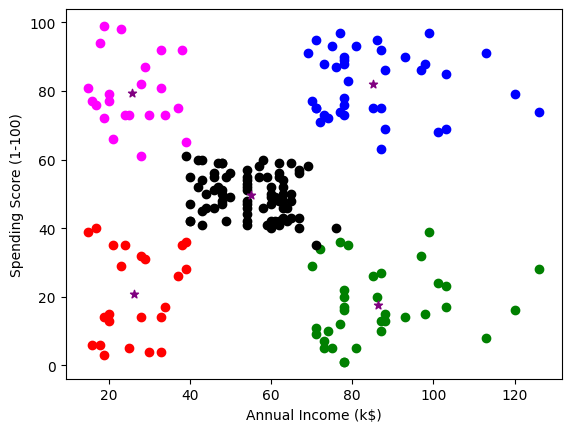

In [ ]:
X = data.iloc[:, [2, 3, 4]].values   # Gender (encoded), Age, Income, Spending Score

# 3. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(data1['Annual Income (k$)'],data1['Spending Score (1-100)'],color='green')
plt.scatter(data2['Annual Income (k$)'],data2['Spending Score (1-100)'],color='red')
plt.scatter(data3['Annual Income (k$)'],data3['Spending Score (1-100)'],color='black')
plt.scatter(data4['Annual Income (k$)'],data4['Spending Score (1-100)'],color='blue')
plt.scatter(data5['Annual Income (k$)'],data5['Spending Score (1-100)'],color='magenta')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# combine clusters with their centres

*● Use PCA or t-SNE to visualize the clusters*  

In [ ]:
# Using PCA

X = data.iloc[:, [1, 2, 3, 4]].values

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'PCA 2')

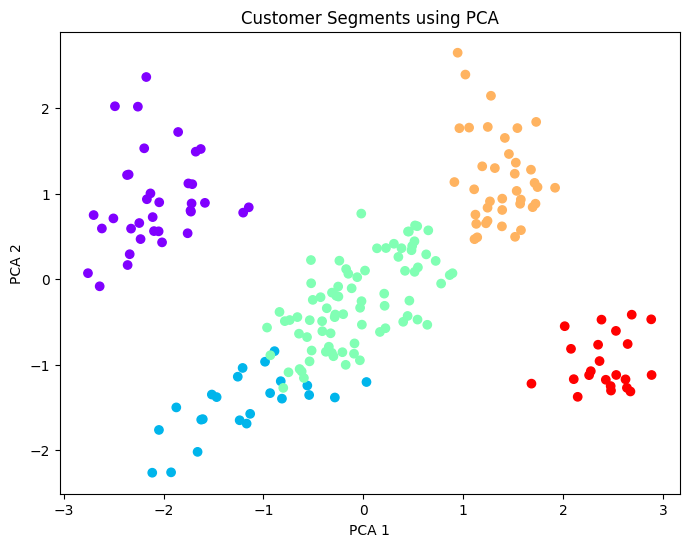

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data['cluster'], cmap='rainbow')
plt.title("Customer Segments using PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

***● Suggest relevant marketing strategies for each identified segment***


## Marketing Strategies for Each Customer Segment

### **Cluster 0 – Big Spenders with Big Wallets**

***Who they are:***   
Wealthy individuals who love shopping and don’t mind spending on premium products.

✨ *How to engage them:*

* Roll out **VIP loyalty programs** and **exclusive events**.
* Offer **early access to luxury collections**.
* Make them feel special with **personalized shopping experiences**.

---

### **Cluster 1 – Budget-Savvy Shoppers**

***Who they are:***
Students or people with tighter budgets who shop carefully.

✨ *How to engage them:*

* Share **discount deals** and **seasonal sales**.
* Create **bundle offers** so they save more when they buy more.
* Use **referral rewards** to keep them coming back.

---

### **Cluster 2 – Practical Families / Middle-Class Shoppers**

***Who they are:***
Average income households who shop moderately.

✨ *How to engage them:*

* Introduce **membership cards with cashback**.
* Run **family-friendly promotions** (e.g., back-to-school, holiday offers).
* Highlight **value-for-money** products in campaigns.

---

### **Cluster 3 – Wealthy but Reserved Shoppers**

***Who they are:***
Customers with high income but careful spending habits.

✨ *How to engage them:*

* Focus on **quality and trust** in marketing.
* Use **personalized recommendations** to encourage spending.
* Offer **exclusive previews** to make them feel valued without being pushy.


---

### **Cluster 4 – Trendy Impulse Buyers**

***Who they are:***
Younger shoppers with smaller incomes but a strong desire to stay trendy.

✨ *How to engage them:*

* Run **flash sales** and **social media campaigns** on trending items.
* Provide **easy installment options** (buy now, pay later).
* Create excitement with **limited-time offers**.

---


